# 📊 Visualisasi Data Medical Insurance Cost Dataset

Notebook ini berisi berbagai visualisasi menarik untuk menganalisis data biaya asuransi kesehatan dengan **100,000 records** dan **54+ columns**.

## 📦 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Set style untuk visualisasi yang lebih menarik
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
warnings.filterwarnings('ignore')

print("✅ Libraries berhasil di-import!")

✅ Libraries berhasil di-import!


## 📂 Load Dataset

In [2]:
# Load data
df = pd.read_csv('medical_insurance.csv')

print(f"📊 Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print("\n✨ First 5 rows:")
df.head()

📊 Dataset Shape: 100,000 rows × 54 columns

✨ First 5 rows:


,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


## 🧹 Data Cleaning

In [ ]:
# Fix kolom-kolom yang menggunakan string "None" untuk kategori
# Kolom-kolom ini menggunakan "None" sebagai kategori, bukan missing value

# Cek unique values sebelum cleaning
print("🔍 Checking data before cleaning...")
print(f"\nalcohol_freq unique values: {df['alcohol_freq'].unique()}")
print(f"exercise_frequency unique values: {df['exercise_frequency'].unique()}")

# Convert NaN atau empty values menjadi string "None" untuk kolom kategorikal
categorical_none_cols = ['alcohol_freq', 'exercise_frequency']

for col in categorical_none_cols:
    # Replace NaN/None dengan string "None"
    df[col] = df[col].fillna('None')
    # Pastikan semua values adalah string
    df[col] = df[col].astype(str)
    print(f"\n✅ {col}: {df[col].isna().sum()} missing values")

print("\n🎉 Data cleaning selesai!")
print(f"\nalcohol_freq value counts:\n{df['alcohol_freq'].value_counts()}")
print(f"\nexercise_frequency value counts:\n{df['exercise_frequency'].value_counts()}")

## 🔍 Explorasi Data

In [3]:
# Info dataset
print("📋 Dataset Info:")
print(df.info())
print("\n📊 Statistical Summary:")
df.describe()

📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  object 
 3   region                       100000 non-null  object 
 4   urban_rural                  100000 non-null  object 
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  object 
 7   marital_status               100000 non-null  object 
 8   employment_status            100000 non-null  object 
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-nul

,person_id,age,income,household_size,dependents,bmi,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,50000.500000,47.521500,4.987390e+04,2.430900,0.898380,26.990512,1.92765,0.093640,0.373350,1.236320,...,0.014770,0.108310,0.130140,0.508530,0.158690,0.508390,0.50933,0.509140,0.367810,0.169700
std,28867.657797,15.988752,4.680021e+04,1.075126,0.950654,4.994883,1.73773,0.304848,1.373011,1.209358,...,0.120632,0.310773,0.336459,0.749755,0.463562,0.747218,0.75363,0.750455,0.482212,0.375371
min,1.000000,0.000000,1.100000e+03,1.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,25000.750000,37.000000,2.110000e+04,2.000000,0.000000,23.600000,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,50000.500000,48.000000,3.620000e+04,2.000000,1.000000,27.000000,2.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,75000.250000,58.000000,6.220000e+04,3.000000,1.000000,30.400000,3.00000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000
max,100000.000000,100.000000,1.061800e+06,9.000000,7.000000,50.400000,25.00000,3.000000,21.000000,11.000000,...,1.000000,1.000000,1.000000,7.000000,6.000000,7.000000,7.00000,7.000000,1.000000,1.000000


## 🎨 Visualisasi 1: Distribusi Annual Medical Cost

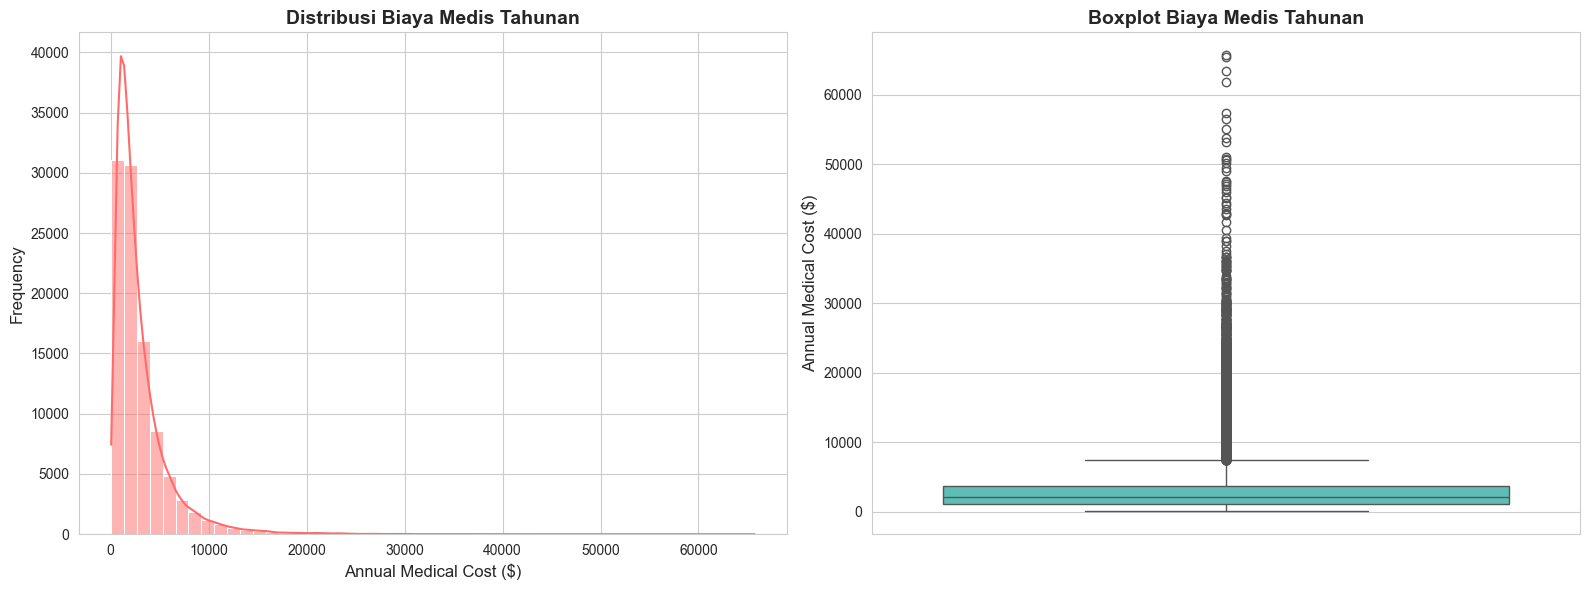

💰 Mean: $3,009.45
📊 Median: $2,082.57
📈 Max: $65,724.90


In [4]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram dengan KDE
sns.histplot(data=df, x='annual_medical_cost', kde=True, bins=50, 
             color='#FF6B6B', ax=axes[0])
axes[0].set_title('Distribusi Biaya Medis Tahunan', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Annual Medical Cost ($)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].ticklabel_format(style='plain', axis='x')

# Boxplot
sns.boxplot(data=df, y='annual_medical_cost', color='#4ECDC4', ax=axes[1])
axes[1].set_title('Boxplot Biaya Medis Tahunan', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Annual Medical Cost ($)', fontsize=12)
axes[1].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

print(f"💰 Mean: ${df['annual_medical_cost'].mean():,.2f}")
print(f"📊 Median: ${df['annual_medical_cost'].median():,.2f}")
print(f"📈 Max: ${df['annual_medical_cost'].max():,.2f}")

## 🎨 Visualisasi 2: Korelasi antara BMI, Age, dan Medical Cost

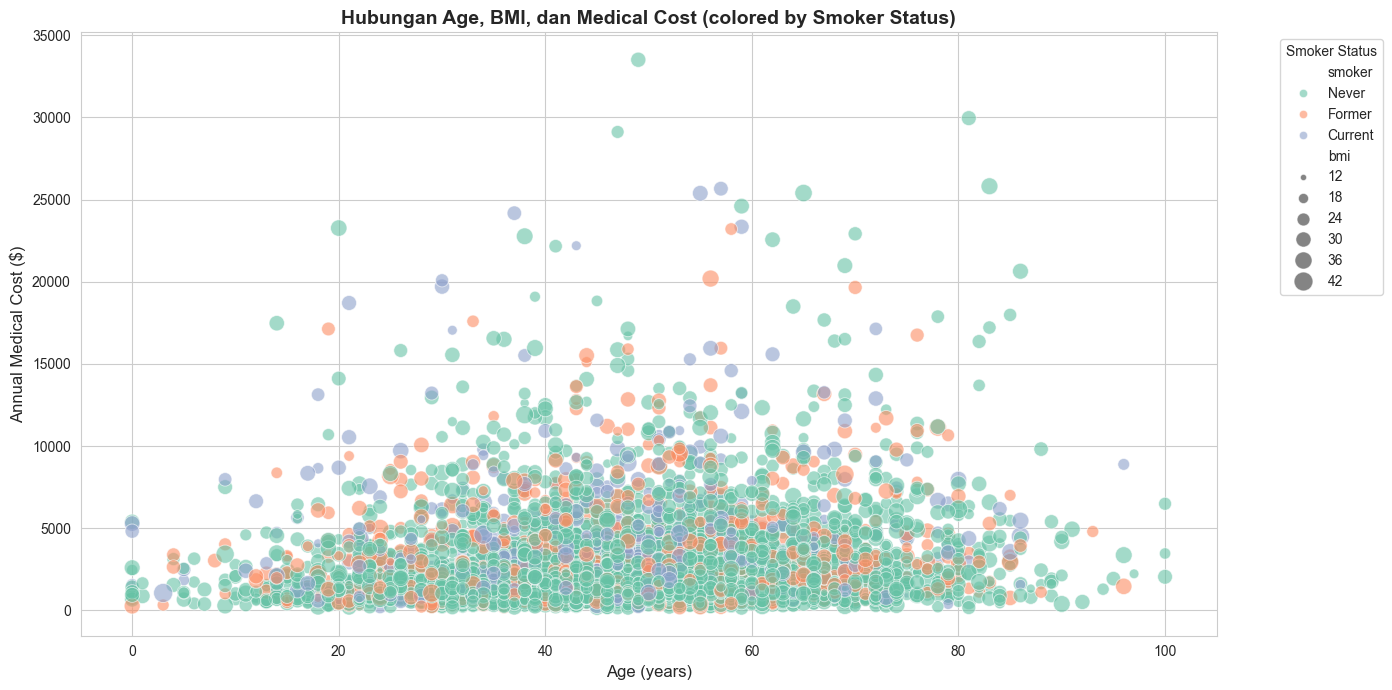

In [5]:
# Scatter plot dengan hue untuk smoker status
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df.sample(5000), x='age', y='annual_medical_cost', 
                hue='smoker', size='bmi', sizes=(20, 200),
                palette='Set2', alpha=0.6)
plt.title('Hubungan Age, BMI, dan Medical Cost (colored by Smoker Status)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Annual Medical Cost ($)', fontsize=12)
plt.legend(title='Smoker Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

## 🎨 Visualisasi 3: Medical Cost berdasarkan Demographics

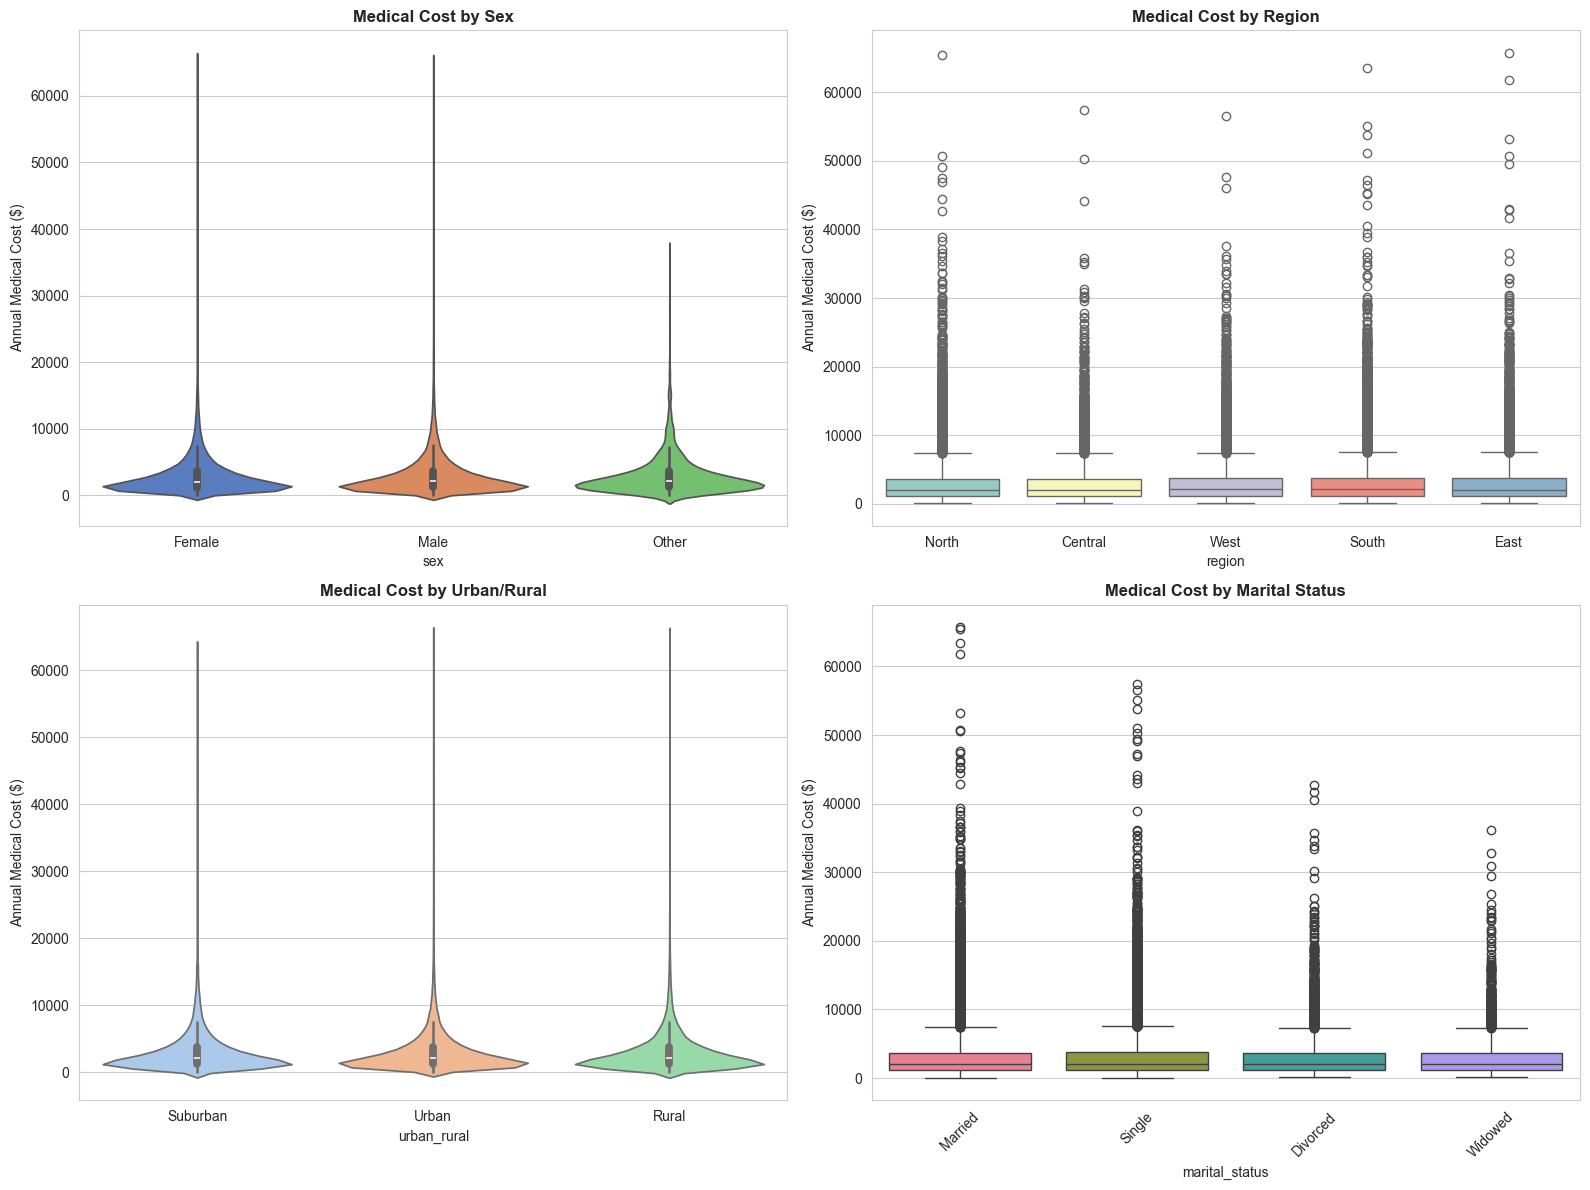

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Violin plot by Sex
sns.violinplot(data=df, x='sex', y='annual_medical_cost', 
               palette='muted', ax=axes[0, 0])
axes[0, 0].set_title('Medical Cost by Sex', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Annual Medical Cost ($)', fontsize=10)
axes[0, 0].ticklabel_format(style='plain', axis='y')

# Box plot by Region
sns.boxplot(data=df, x='region', y='annual_medical_cost', 
            palette='Set3', ax=axes[0, 1])
axes[0, 1].set_title('Medical Cost by Region', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Annual Medical Cost ($)', fontsize=10)
axes[0, 1].ticklabel_format(style='plain', axis='y')

# Violin plot by Urban/Rural
sns.violinplot(data=df, x='urban_rural', y='annual_medical_cost', 
               palette='pastel', ax=axes[1, 0])
axes[1, 0].set_title('Medical Cost by Urban/Rural', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Annual Medical Cost ($)', fontsize=10)
axes[1, 0].ticklabel_format(style='plain', axis='y')

# Box plot by Marital Status
sns.boxplot(data=df, x='marital_status', y='annual_medical_cost', 
            palette='husl', ax=axes[1, 1])
axes[1, 1].set_title('Medical Cost by Marital Status', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Annual Medical Cost ($)', fontsize=10)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

## 🎨 Visualisasi 4: Heatmap Korelasi Variabel Numerik

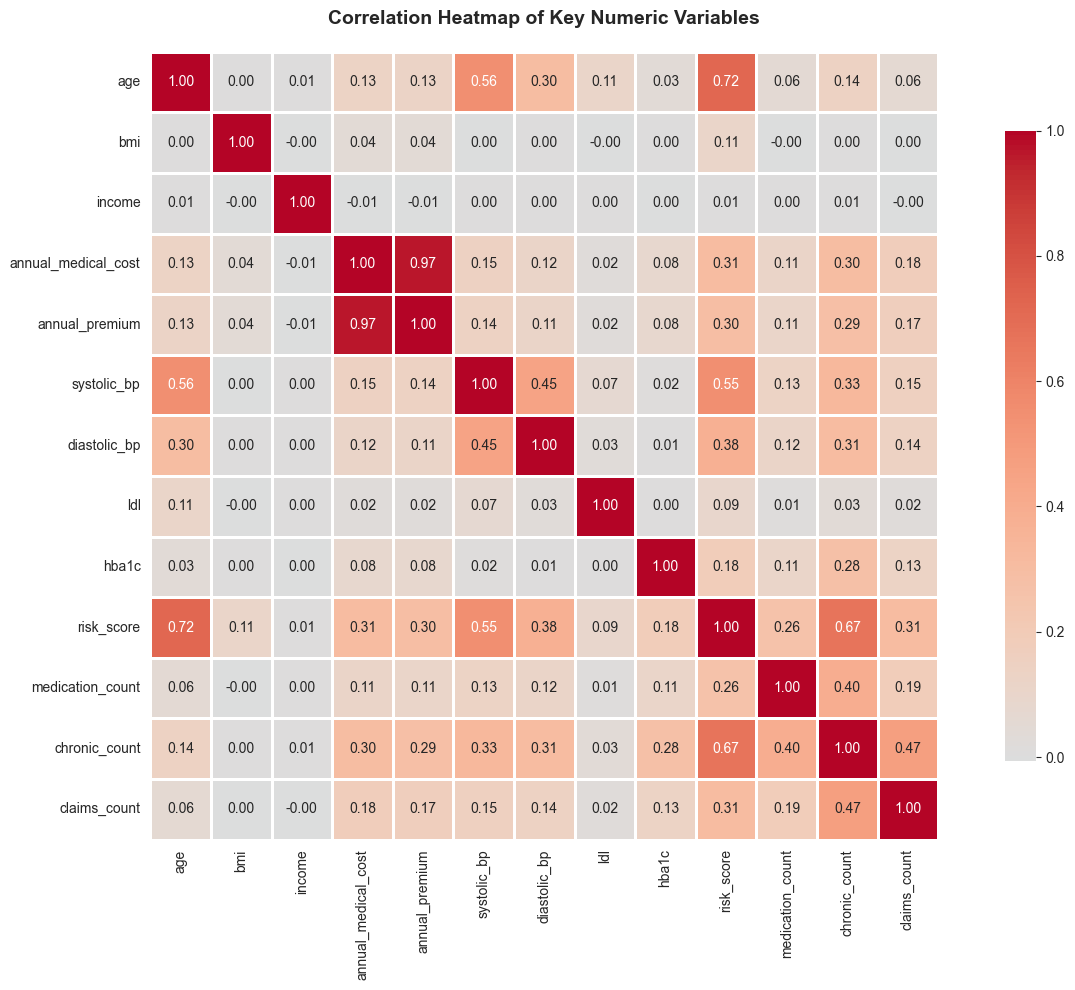

In [7]:
# Pilih kolom numerik penting
numeric_cols = ['age', 'bmi', 'income', 'annual_medical_cost', 'annual_premium', 
                'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c', 'risk_score',
                'medication_count', 'chronic_count', 'claims_count']

# Hitung korelasi
correlation_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Key Numeric Variables', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 🎨 Visualisasi 5: Health Conditions Impact pada Medical Cost

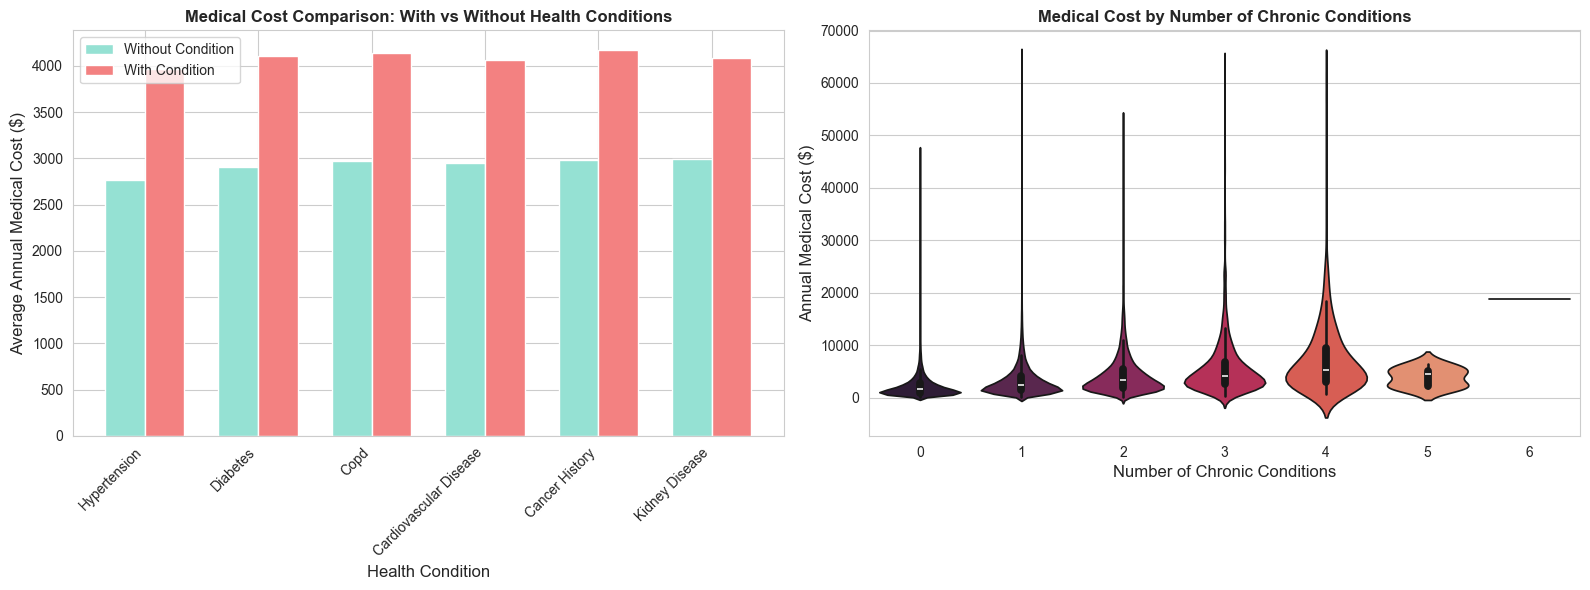

In [8]:
health_conditions = ['hypertension', 'diabetes', 'copd', 'cardiovascular_disease', 
                     'cancer_history', 'kidney_disease']

# Hitung rata-rata biaya untuk setiap kondisi
health_costs = []
for condition in health_conditions:
    avg_cost = df.groupby(condition)['annual_medical_cost'].mean()
    health_costs.append({
        'Condition': condition.replace('_', ' ').title(),
        'Without': avg_cost[0],
        'With': avg_cost[1]
    })

health_df = pd.DataFrame(health_costs)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Grouped bar plot
x = np.arange(len(health_df))
width = 0.35
axes[0].bar(x - width/2, health_df['Without'], width, label='Without Condition', color='#95E1D3')
axes[0].bar(x + width/2, health_df['With'], width, label='With Condition', color='#F38181')
axes[0].set_xlabel('Health Condition', fontsize=12)
axes[0].set_ylabel('Average Annual Medical Cost ($)', fontsize=12)
axes[0].set_title('Medical Cost Comparison: With vs Without Health Conditions', 
                  fontsize=12, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(health_df['Condition'], rotation=45, ha='right')
axes[0].legend()
axes[0].ticklabel_format(style='plain', axis='y')

# Chronic count distribution
sns.violinplot(data=df, x='chronic_count', y='annual_medical_cost', 
               palette='rocket', ax=axes[1])
axes[1].set_title('Medical Cost by Number of Chronic Conditions', 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Number of Chronic Conditions', fontsize=12)
axes[1].set_ylabel('Annual Medical Cost ($)', fontsize=12)
axes[1].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

## 🎨 Visualisasi 6: Insurance Plan Analysis

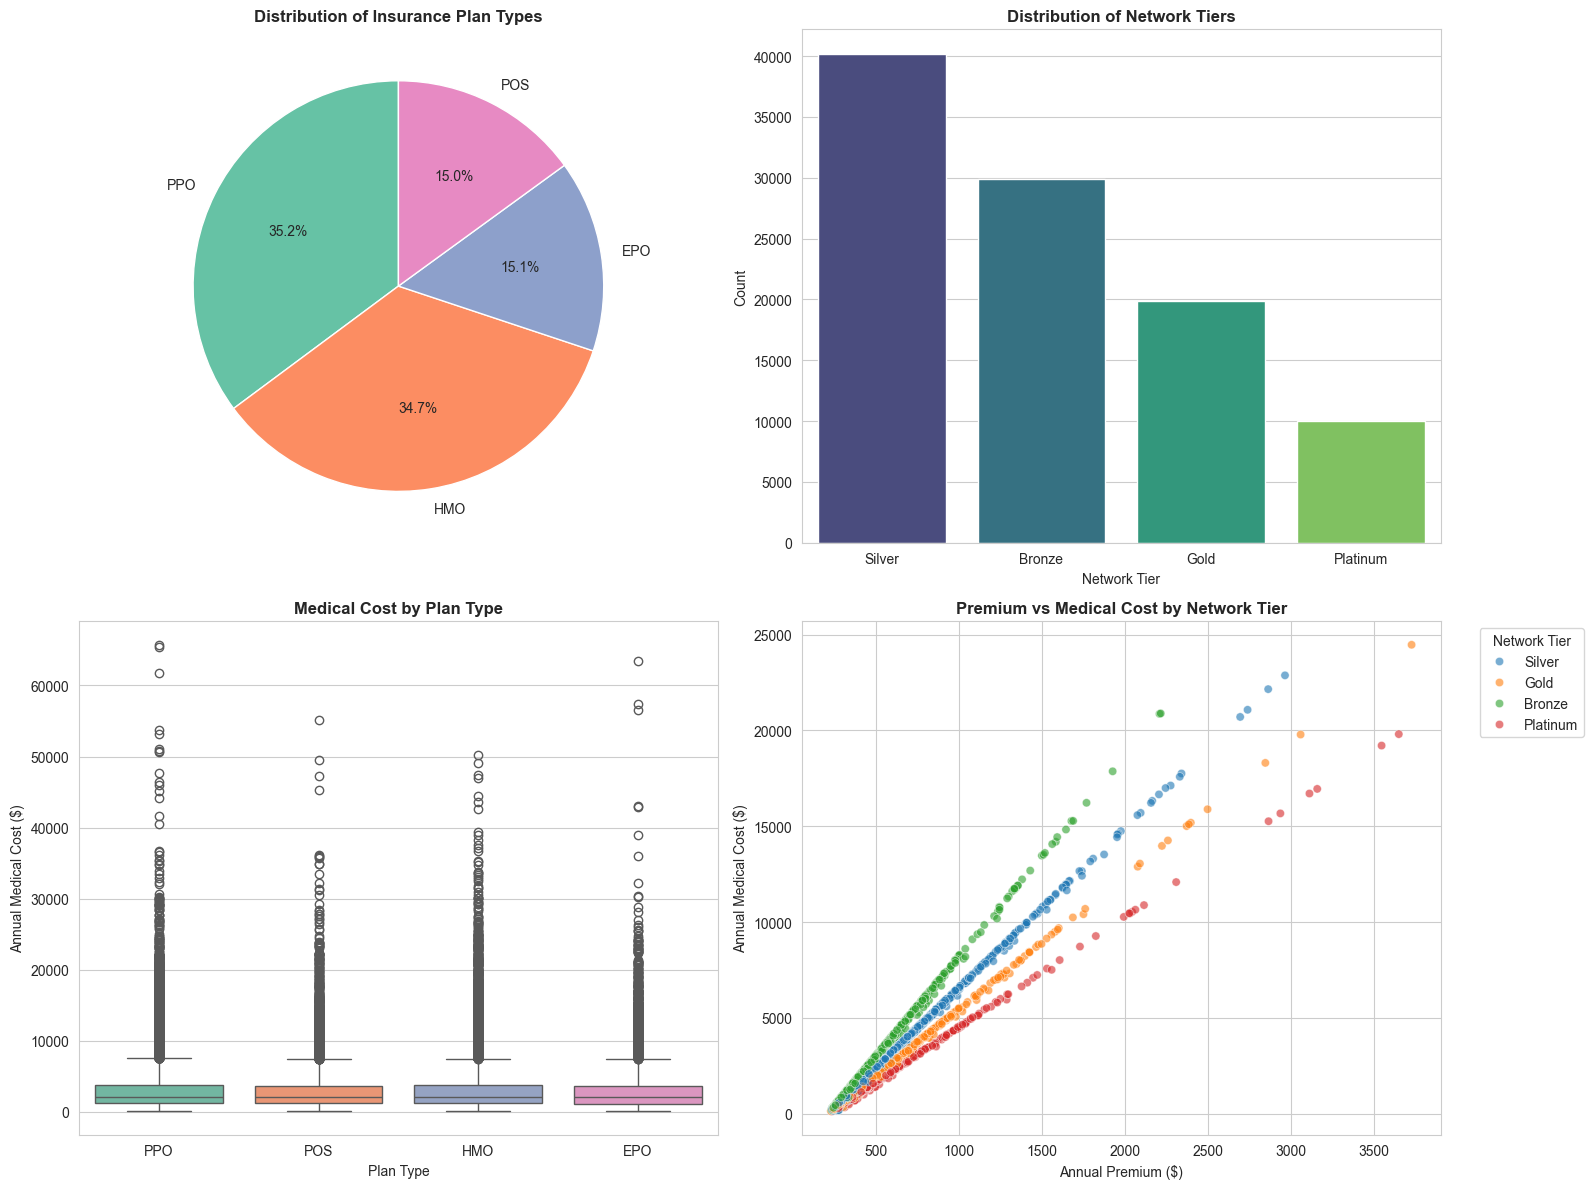

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plan Type Distribution
plan_counts = df['plan_type'].value_counts()
colors_plan = sns.color_palette('Set2', len(plan_counts))
axes[0, 0].pie(plan_counts.values, labels=plan_counts.index, autopct='%1.1f%%',
               colors=colors_plan, startangle=90)
axes[0, 0].set_title('Distribution of Insurance Plan Types', fontsize=12, fontweight='bold')

# Network Tier Distribution
network_counts = df['network_tier'].value_counts()
sns.barplot(x=network_counts.index, y=network_counts.values, 
            palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Network Tiers', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Network Tier', fontsize=10)
axes[0, 1].set_ylabel('Count', fontsize=10)
axes[0, 1].ticklabel_format(style='plain', axis='y')

# Medical Cost by Plan Type
sns.boxplot(data=df, x='plan_type', y='annual_medical_cost', 
            palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('Medical Cost by Plan Type', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Plan Type', fontsize=10)
axes[1, 0].set_ylabel('Annual Medical Cost ($)', fontsize=10)
axes[1, 0].ticklabel_format(style='plain', axis='y')

# Premium vs Medical Cost by Network Tier
sns.scatterplot(data=df.sample(3000), x='annual_premium', y='annual_medical_cost',
                hue='network_tier', palette='tab10', alpha=0.6, ax=axes[1, 1])
axes[1, 1].set_title('Premium vs Medical Cost by Network Tier', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Annual Premium ($)', fontsize=10)
axes[1, 1].set_ylabel('Annual Medical Cost ($)', fontsize=10)
axes[1, 1].legend(title='Network Tier', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].ticklabel_format(style='plain', axis='both')

plt.tight_layout()
plt.show()

## 🎨 Visualisasi 7: Lifestyle Factors Impact

ValueError: Could not interpret value `exercise_frequency` for `x`. An entry with this name does not appear in `data`.

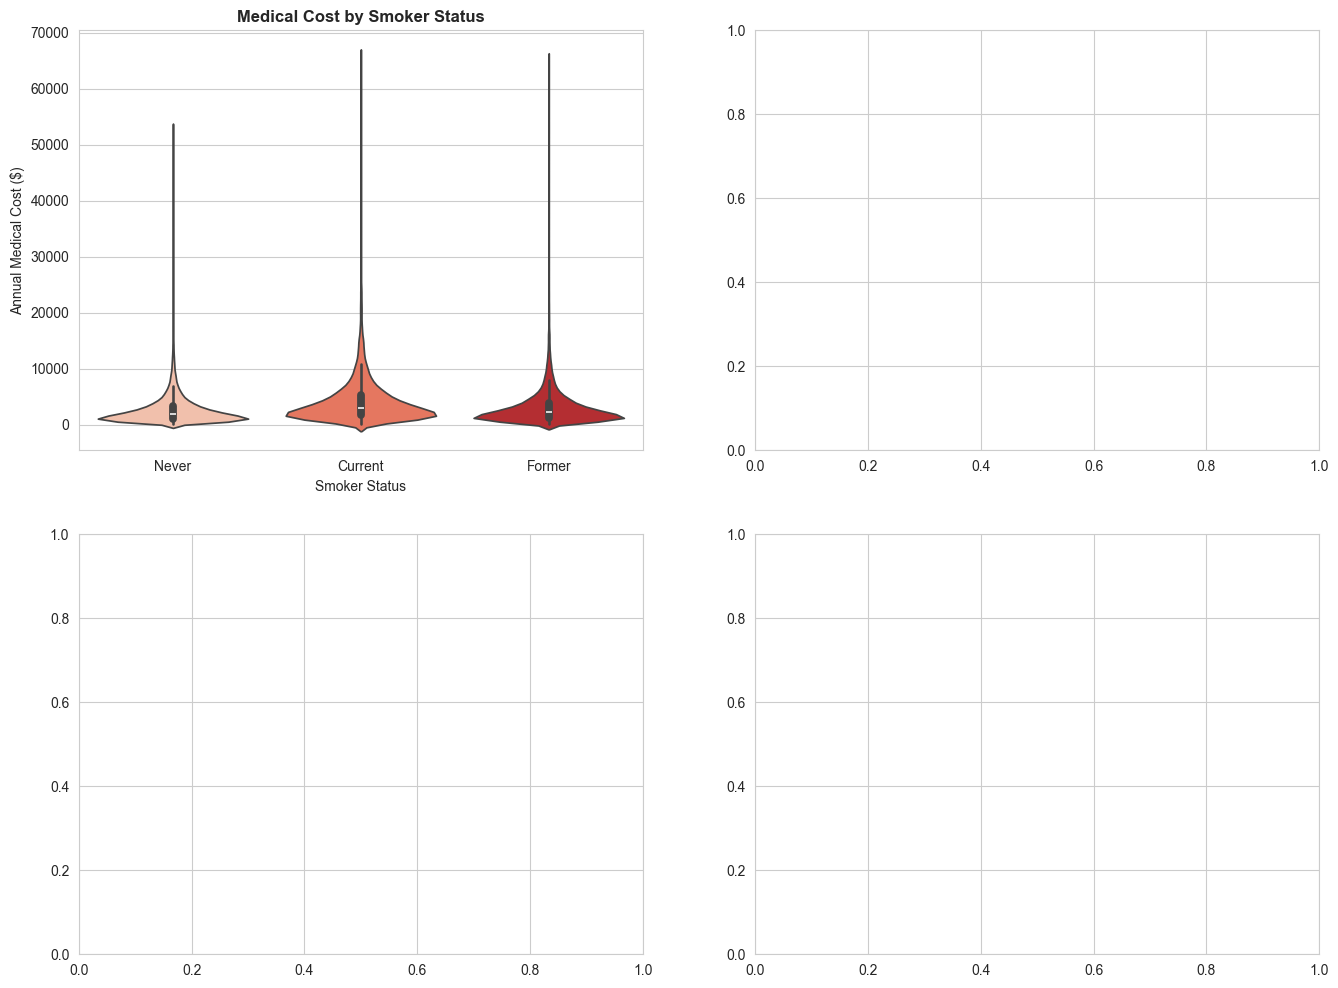

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Smoker Status
sns.violinplot(data=df, x='smoker', y='annual_medical_cost', 
               palette='Reds', ax=axes[0, 0])
axes[0, 0].set_title('Medical Cost by Smoker Status', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Smoker Status', fontsize=10)
axes[0, 0].set_ylabel('Annual Medical Cost ($)', fontsize=10)
axes[0, 0].ticklabel_format(style='plain', axis='y')

# Exercise Frequency
exercise_order = ['None', 'Rare', 'Weekly', 'Daily']
sns.boxplot(data=df, x='exercise_frequency', y='annual_medical_cost',
            order=exercise_order, palette='Greens', ax=axes[0, 1])
axes[0, 1].set_title('Medical Cost by Exercise Frequency', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Exercise Frequency', fontsize=10)
axes[0, 1].set_ylabel('Annual Medical Cost ($)', fontsize=10)
axes[0, 1].ticklabel_format(style='plain', axis='y')

# Alcohol Frequency
alcohol_order = ['None', 'Rare', 'Weekly', 'Daily']
sns.violinplot(data=df, x='alcohol_freq', y='annual_medical_cost',
               order=alcohol_order, palette='Purples', ax=axes[1, 0])
axes[1, 0].set_title('Medical Cost by Alcohol Frequency', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Alcohol Frequency', fontsize=10)
axes[1, 0].set_ylabel('Annual Medical Cost ($)', fontsize=10)
axes[1, 0].ticklabel_format(style='plain', axis='y')

# Sleep Hours vs Medical Cost
sns.scatterplot(data=df.sample(3000), x='sleep_hours', y='annual_medical_cost',
                hue='stress_level', palette='YlOrRd', alpha=0.6, ax=axes[1, 1])
axes[1, 1].set_title('Sleep Hours vs Medical Cost (colored by Stress Level)', 
                     fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Sleep Hours', fontsize=10)
axes[1, 1].set_ylabel('Annual Medical Cost ($)', fontsize=10)
axes[1, 1].legend(title='Stress Level', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

## 🎨 Visualisasi 8: Healthcare Utilization Analysis

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Visits vs Medical Cost
sns.regplot(data=df.sample(5000), x='visits_last_year', y='annual_medical_cost',
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, ax=axes[0, 0])
axes[0, 0].set_title('Doctor Visits vs Medical Cost', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Visits Last Year', fontsize=10)
axes[0, 0].set_ylabel('Annual Medical Cost ($)', fontsize=10)
axes[0, 0].ticklabel_format(style='plain', axis='y')

# Hospitalizations impact
sns.violinplot(data=df, x='hospitalizations_last_3yrs', y='annual_medical_cost',
               palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Medical Cost by Hospitalizations (Last 3 Years)', 
                     fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Number of Hospitalizations', fontsize=10)
axes[0, 1].set_ylabel('Annual Medical Cost ($)', fontsize=10)
axes[0, 1].ticklabel_format(style='plain', axis='y')

# Medication Count
sns.boxplot(data=df, x='medication_count', y='annual_medical_cost',
            palette='RdYlGn_r', ax=axes[1, 0])
axes[1, 0].set_title('Medical Cost by Medication Count', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Number of Medications', fontsize=10)
axes[1, 0].set_ylabel('Annual Medical Cost ($)', fontsize=10)
axes[1, 0].ticklabel_format(style='plain', axis='y')

# Major Procedures
procedure_data = df.groupby('had_major_procedure')['annual_medical_cost'].mean()
colors_proc = ['#82CD47', '#FF6B6B']
axes[1, 1].bar(procedure_data.index, procedure_data.values, color=colors_proc)
axes[1, 1].set_title('Average Medical Cost: Major Procedure Impact', 
                     fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Had Major Procedure', fontsize=10)
axes[1, 1].set_ylabel('Average Annual Medical Cost ($)', fontsize=10)
axes[1, 1].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

## 🎨 Visualisasi 9: Risk Score & Claims Analysis

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Risk Score Distribution
sns.histplot(data=df, x='risk_score', kde=True, bins=30, 
             color='#FF6B9D', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Risk Scores', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Risk Score', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)

# Risk Score vs Medical Cost
sns.scatterplot(data=df.sample(5000), x='risk_score', y='annual_medical_cost',
                hue='is_high_risk', palette='rocket', alpha=0.5, ax=axes[0, 1])
axes[0, 1].set_title('Risk Score vs Medical Cost', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Risk Score', fontsize=10)
axes[0, 1].set_ylabel('Annual Medical Cost ($)', fontsize=10)
axes[0, 1].legend(title='High Risk', loc='upper left')
axes[0, 1].ticklabel_format(style='plain', axis='y')

# Claims Count Distribution
sns.violinplot(data=df, x='claims_count', y='annual_medical_cost',
               palette='mako', ax=axes[1, 0])
axes[1, 0].set_title('Medical Cost by Claims Count', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Number of Claims', fontsize=10)
axes[1, 0].set_ylabel('Annual Medical Cost ($)', fontsize=10)
axes[1, 0].ticklabel_format(style='plain', axis='y')

# High Risk vs Regular Risk
risk_comparison = df.groupby('is_high_risk')['annual_medical_cost'].mean()
colors_risk = ['#A7C7E7', '#FF6B6B']
bars = axes[1, 1].bar(['Regular Risk', 'High Risk'], risk_comparison.values, 
                      color=colors_risk, edgecolor='black', linewidth=2)
axes[1, 1].set_title('Average Medical Cost: High Risk vs Regular Risk', 
                     fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Average Annual Medical Cost ($)', fontsize=10)
axes[1, 1].ticklabel_format(style='plain', axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'${height:,.0f}',
                    ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 🎨 Visualisasi 10: Socioeconomic Factors

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Income vs Medical Cost
sns.scatterplot(data=df.sample(5000), x='income', y='annual_medical_cost',
                hue='education', palette='tab10', alpha=0.5, ax=axes[0, 0])
axes[0, 0].set_title('Income vs Medical Cost (by Education)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Annual Income ($)', fontsize=10)
axes[0, 0].set_ylabel('Annual Medical Cost ($)', fontsize=10)
axes[0, 0].legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 0].ticklabel_format(style='plain', axis='both')

# Education Level
education_order = ['No HS', 'HS', 'Some College', 'Bachelor', 'Master', 'Doctorate']
sns.boxplot(data=df, x='education', y='annual_medical_cost',
            order=education_order, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Medical Cost by Education Level', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Education Level', fontsize=10)
axes[0, 1].set_ylabel('Annual Medical Cost ($)', fontsize=10)
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].ticklabel_format(style='plain', axis='y')

# Employment Status
sns.violinplot(data=df, x='employment_status', y='annual_medical_cost',
               palette='Set3', ax=axes[1, 0])
axes[1, 0].set_title('Medical Cost by Employment Status', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Employment Status', fontsize=10)
axes[1, 0].set_ylabel('Annual Medical Cost ($)', fontsize=10)
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].ticklabel_format(style='plain', axis='y')

# Household Size
sns.boxplot(data=df, x='household_size', y='annual_medical_cost',
            palette='RdYlBu', ax=axes[1, 1])
axes[1, 1].set_title('Medical Cost by Household Size', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Household Size', fontsize=10)
axes[1, 1].set_ylabel('Annual Medical Cost ($)', fontsize=10)
axes[1, 1].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

## 🎨 Visualisasi 11: Age Group Analysis

In [ ]:
# Create age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 100], 
                         labels=['0-18', '19-30', '31-45', '46-60', '60+'])

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age distribution
sns.histplot(data=df, x='age', kde=True, bins=30, color='#5DADE2', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Age (years)', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)

# Medical Cost by Age Group
sns.boxplot(data=df, x='age_group', y='annual_medical_cost',
            palette='RdYlGn_r', ax=axes[0, 1])
axes[0, 1].set_title('Medical Cost by Age Group', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Age Group', fontsize=10)
axes[0, 1].set_ylabel('Annual Medical Cost ($)', fontsize=10)
axes[0, 1].ticklabel_format(style='plain', axis='y')

# Age vs BMI colored by Medical Cost
scatter = axes[1, 0].scatter(df.sample(5000)['age'], df.sample(5000)['bmi'],
                             c=df.sample(5000)['annual_medical_cost'], 
                             cmap='YlOrRd', alpha=0.5, s=30)
axes[1, 0].set_title('Age vs BMI (colored by Medical Cost)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Age (years)', fontsize=10)
axes[1, 0].set_ylabel('BMI', fontsize=10)
plt.colorbar(scatter, ax=axes[1, 0], label='Medical Cost ($)')

# Average cost by age group and sex
age_sex_cost = df.groupby(['age_group', 'sex'])['annual_medical_cost'].mean().reset_index()
age_sex_pivot = age_sex_cost.pivot(index='age_group', columns='sex', values='annual_medical_cost')
age_sex_pivot.plot(kind='bar', ax=axes[1, 1], color=['#FF6B9D', '#4ECDC4'])
axes[1, 1].set_title('Average Medical Cost by Age Group and Sex', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Age Group', fontsize=10)
axes[1, 1].set_ylabel('Average Annual Medical Cost ($)', fontsize=10)
axes[1, 1].legend(title='Sex')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

## 🎨 Visualisasi 12: Pairplot - Key Variables Relationship

In [ ]:
# Select key variables for pairplot (dengan sample untuk performa)
pairplot_vars = ['age', 'bmi', 'annual_medical_cost', 'risk_score', 'chronic_count']
sample_data = df[pairplot_vars + ['smoker']].sample(2000)

# Create pairplot
pairplot = sns.pairplot(sample_data, hue='smoker', palette='Set1', 
                        diag_kind='kde', plot_kws={'alpha': 0.6})
pairplot.fig.suptitle('Pairplot: Key Variables Relationships (colored by Smoker Status)', 
                      y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 📊 Summary Statistics

In [ ]:
print("=" * 80)
print("📊 MEDICAL INSURANCE DATASET - KEY INSIGHTS")
print("=" * 80)

print(f"\n📌 Dataset Overview:")
print(f"   • Total Records: {len(df):,}")
print(f"   • Total Features: {len(df.columns)}")

print(f"\n💰 Medical Cost Statistics:")
print(f"   • Average Annual Cost: ${df['annual_medical_cost'].mean():,.2f}")
print(f"   • Median Annual Cost: ${df['annual_medical_cost'].median():,.2f}")
print(f"   • Min Cost: ${df['annual_medical_cost'].min():,.2f}")
print(f"   • Max Cost: ${df['annual_medical_cost'].max():,.2f}")

print(f"\n👥 Demographics:")
print(f"   • Average Age: {df['age'].mean():.1f} years")
print(f"   • Average BMI: {df['bmi'].mean():.1f}")
print(f"   • Male: {(df['sex'] == 'Male').sum():,} ({(df['sex'] == 'Male').sum()/len(df)*100:.1f}%)")
print(f"   • Female: {(df['sex'] == 'Female').sum():,} ({(df['sex'] == 'Female').sum()/len(df)*100:.1f}%)")

print(f"\n🏥 Health Conditions:")
print(f"   • Hypertension: {df['hypertension'].sum():,} ({df['hypertension'].sum()/len(df)*100:.1f}%)")
print(f"   • Diabetes: {df['diabetes'].sum():,} ({df['diabetes'].sum()/len(df)*100:.1f}%)")
print(f"   • Average Chronic Conditions: {df['chronic_count'].mean():.2f}")

print(f"\n🚬 Lifestyle Factors:")
smoker_pct = (df['smoker'] != 'Never').sum() / len(df) * 100
print(f"   • Smokers: {(df['smoker'] != 'Never').sum():,} ({smoker_pct:.1f}%)")
print(f"   • Average Sleep Hours: {df['sleep_hours'].mean():.1f}")

print(f"\n💼 Insurance Plans:")
for plan in df['plan_type'].value_counts().items():
    print(f"   • {plan[0]}: {plan[1]:,} ({plan[1]/len(df)*100:.1f}%)")

print(f"\n⚠️ Risk Assessment:")
print(f"   • High Risk Patients: {df['is_high_risk'].sum():,} ({df['is_high_risk'].sum()/len(df)*100:.1f}%)")
print(f"   • Average Risk Score: {df['risk_score'].mean():.2f}")

print(f"\n📈 Healthcare Utilization:")
print(f"   • Average Visits/Year: {df['visits_last_year'].mean():.1f}")
print(f"   • Average Medications: {df['medication_count'].mean():.1f}")
print(f"   • Had Major Procedure: {df['had_major_procedure'].sum():,} ({df['had_major_procedure'].sum()/len(df)*100:.1f}%)")

print("\n" + "=" * 80)

---

## 🎯 Kesimpulan

Notebook ini menyajikan **12 visualisasi komprehensif** untuk menganalisis dataset Medical Insurance Cost dengan 100,000 records:

### 📌 Visualisasi yang Dibuat:
1. **Distribusi Annual Medical Cost** - Histogram & Boxplot
2. **Korelasi BMI, Age, Medical Cost** - Scatter plot dengan size mapping
3. **Medical Cost berdasarkan Demographics** - Violin & Box plots
4. **Heatmap Korelasi** - Menampilkan hubungan antar variabel numerik
5. **Health Conditions Impact** - Analisis penyakit kronis
6. **Insurance Plan Analysis** - Distribusi & perbandingan plan
7. **Lifestyle Factors** - Smoking, exercise, alcohol, sleep
8. **Healthcare Utilization** - Visits, hospitalizations, medications
9. **Risk Score & Claims** - Analisis resiko dan klaim
10. **Socioeconomic Factors** - Income, education, employment
11. **Age Group Analysis** - Segmentasi berdasarkan umur
12. **Pairplot** - Hubungan multi-variabel

### 🎨 Fitur Visualisasi:
- ✨ Color palettes yang menarik dan konsisten
- 📊 Berbagai jenis plot (violin, box, scatter, histogram, heatmap, dll)
- 🎯 Insights yang actionable
- 📈 Statistical summaries

Selamat mengeksplorasi data! 🚀